## Ultimate Inc Challenge


## Part:1

In [1]:
# Managing warnings
import  warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
import math

import json
from pandas.io.json import json_normalize

# Plot the Figures Inline
%matplotlib inline

In [2]:

## display option
pd.set_option('display.max_columns', None)


In [3]:


## missing values
missing_values = ['n/a', 'na', '-', '*']

In [4]:
#timestamps of user logins in a particular geographic location
df_logins = pd.read_json('logins.json')
df_logins.head()


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
df_logins.shape

(93142, 1)

In [6]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [7]:
df_logins.describe()

,login_time
count,93142
unique,92265
top,1970-04-04 01:17:40
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [8]:
print("min time: {}".format(df_logins.login_time.min()))
print("max time: {}".format(df_logins.login_time.max()))

min time: 1970-01-01 20:12:16
max time: 1970-04-13 18:57:38


In [9]:
#Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex for using resample(), NOT RangeIndex
df_logins = df_logins.set_index('login_time')

In [10]:
# aggregate login counts based on 15-minute time intervals
df_logins['count_fifteenMin'] = 0
df_logins = df_logins.resample('15min').count()
df_logins.head()


,count_fifteenMin
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [11]:

df_logins = df_logins.reset_index()

In [12]:

#DatetimeIndex
df_logins.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   login_time        9788 non-null   datetime64[ns]
 1   count_fifteenMin  9788 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 153.1 KB


# Visualize and exploring relationships between resulting time series for logins of 15 minute time intervals

<AxesSubplot:title={'center':'Total logins seasonality'}>

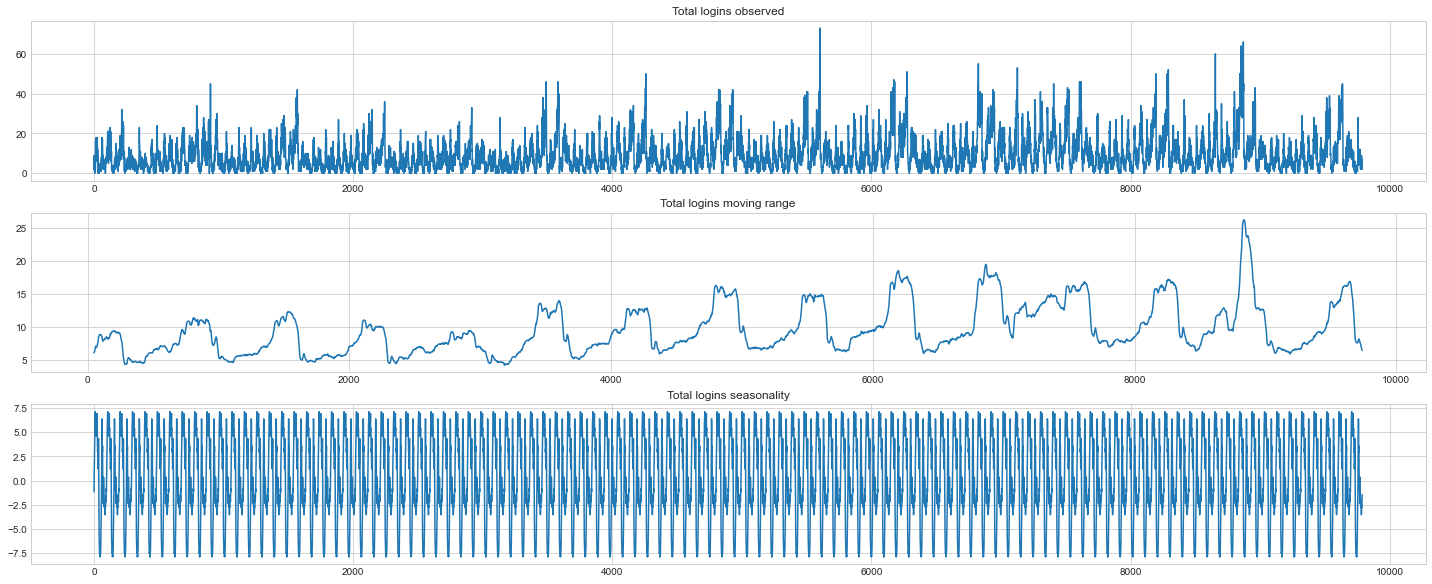

In [13]:
#Create a correlation plot of both datasets.
from statsmodels.tsa.seasonal import seasonal_decompose

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25,10)) 
season = seasonal_decompose(df_logins['count_fifteenMin'], model='additive', period = 96)

plt.subplot(3, 1, 1)
plt.title('Total logins observed')
season.observed.plot()

plt.subplot(3, 1, 2)
plt.title('Total logins moving range')
season.trend.plot()

plt.subplot(3, 1, 3)
plt.title('Total logins seasonality')
season.seasonal.plot()

In [14]:
df_logins['weekday']=df_logins['login_time'].dt.day_name() #weekday = dayofweek (alias)
df_logins.head()

,login_time,count_fifteenMin,weekday
0,1970-01-01 20:00:00,2,Thursday
1,1970-01-01 20:15:00,6,Thursday
2,1970-01-01 20:30:00,9,Thursday
3,1970-01-01 20:45:00,7,Thursday
4,1970-01-01 21:00:00,1,Thursday


In [15]:

# groupby('key', as_index=False): key does not become index but a column (no need reset_index() later)
df_dayweek = df_logins.groupby('weekday', as_index=False).sum()
df_dayweek

,weekday,count_fifteenMin
0,Friday,15208
1,Monday,8823
2,Saturday,19377
3,Sunday,18167
4,Thursday,11960
5,Tuesday,9268
6,Wednesday,10339


Text(0.5, 1.0, 'Logins by Day of Week')

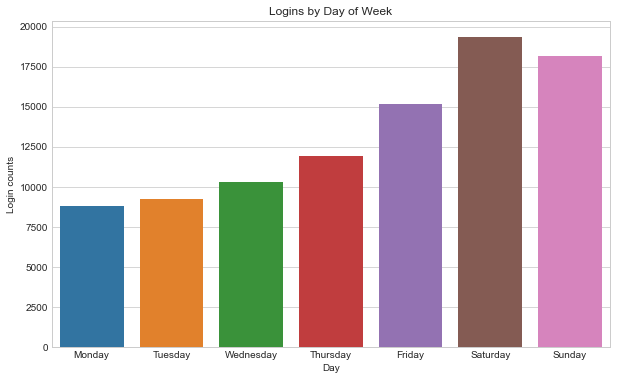

In [16]:

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,6)) 
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# bar plot
sns.barplot(x = 'weekday', y = 'count_fifteenMin', data = df_dayweek, order=weekday_order)
plt.xlabel('Day')
plt.ylabel('Login counts')
plt.title('Logins by Day of Week')


# Most logins occur over the weekends with the most logins occuring on Saturday at 19377. Monday is the lowest with a increase everyday until saturday then drops on sunday. 

In [17]:

df_logins['hour'] = df_logins['login_time'].dt.hour
df_logins.head()


,login_time,count_fifteenMin,weekday,hour
0,1970-01-01 20:00:00,2,Thursday,20
1,1970-01-01 20:15:00,6,Thursday,20
2,1970-01-01 20:30:00,9,Thursday,20
3,1970-01-01 20:45:00,7,Thursday,20
4,1970-01-01 21:00:00,1,Thursday,21


In [18]:

df_hour = df_logins.groupby('hour', as_index=False).sum()
df_hour.head()


,hour,count_fifteenMin
0,0,5993
1,1,6317
2,2,5800
3,3,4831
4,4,5034


Text(0.5, 1.0, 'Logins by Hour')

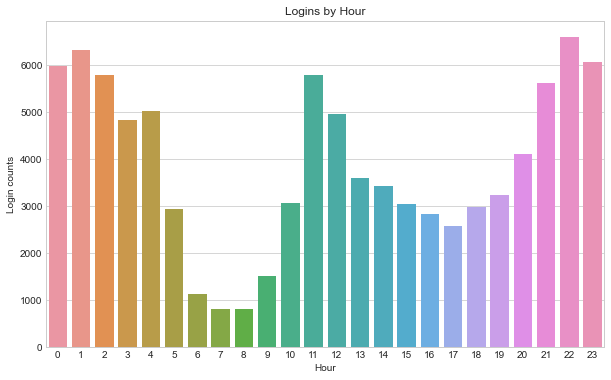

In [19]:
fig = plt.figure(figsize=(10,6))
# bar plot
sns.barplot(x = 'hour', y = 'count_fifteenMin', data = df_hour)
plt.xlabel('Hour')
plt.ylabel('Login counts')
plt.title('Logins by Hour')



# Most logins occur during the evening and late niight sessions from 8PM- 4AM. and a peak around lunch time 11AM-12PM.

In [20]:
df_day_hour = df_logins.groupby(['weekday','hour'], as_index=False).sum()
df_day_hour.head()


,weekday,hour,count_fifteenMin
0,Friday,0,975
1,Friday,1,957
2,Friday,2,771
3,Friday,3,502
4,Friday,4,353


<Figure size 2016x1008 with 0 Axes>

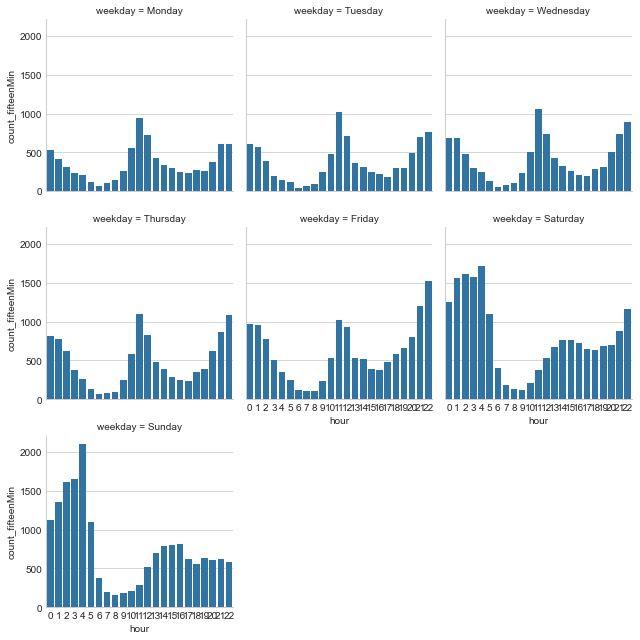

In [21]:
fig = plt.figure(figsize=(28,14))
g = sns.FacetGrid(df_day_hour, col="weekday", col_wrap=3, col_order=weekday_order)
g.map(sns.barplot, "hour", "count_fifteenMin", order=range(0,23))


To summarize: Most logins occur over the weekends with the most logins occuring on Saturday at 19377. Monday is the lowest with a increase everyday until saturday then drops on sunday.  Most logins occur during the evening and late niight sessions from 8PM- 4AM. and a peak around lunch time 11AM-12PM.

## Part 2

1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric:
    
    There are a few different metrics I would take a look at. The first would be toll activity to see if this new experiment has generated any traction, so i would see if the number of toll logins has increased on both sides. Next I would take a look at revenue as this will be the key performance measure of success. The more logins and more traffic we have across the tolls, the more potential revenue we will be able to share. So i would take a look at this as well after all reimbursement costs are deducted and see if there is any increase in profit.
    

2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. 

Please provide details on:
a) how you will implement the experiment:
    To investigate the effectiveness of the proposed change, I would compare two groups of drivers with/without reimbursements and measure the key measures mentioned above. I would recommend dividing the drivers at random by 50% and 50% for each group, one for the drivers offered reimbursement and the other for remaining drivers continuing to operate without being reimbursed for tolls.
    
b) what statistical test(s) you will conduct to verify the significance of the
observation
    To verify the significance of the observation, I perform the A/B test on those two groups. I perform the t-test with a confidence level of 95%, where the null hypothesis is the reimbursing drivers for tolls does not have a statistically significant impact on Ultimate's net profits.
    
c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.
     If the increased revenue is positive, then it is effective to encourage driver partners by reimbursing toll costs. If the increased revenue is negative, they should not adopt the toll cost reimbursement. Even it is revealed the increased revenue is positive, the drivers have randomly chosen, and it may not be effective in all cases. We need more rigorous experiments by different variables (e.g., selecting other drivers, differnt portions, different days, etc.)

## Part 3

1)Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

2) Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.

3) Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice)

## Data Wrangling and Cleaning

In [22]:

#users = pd.read_json('data/ultimate_data_challenge.json') #pd.read_json failed
#Then, open file, load with normal "json.load", then load into a pandas dataframe

with open('ultimate_data_challenge.json') as f:
    data = json.load(f)
    
df = pd.DataFrame(data)
df.head()


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [23]:
df.shape

(50000, 12)

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [25]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [26]:

# check nulls : get index of null values and get dataframe
df[df['avg_rating_of_driver'].isnull()].head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,Android,0.0,False,100.0,3.95,4.0
9,Winterfell,1,2014-01-03,NaN,1.0,2014-01-05,Android,0.0,False,0.0,2.37,5.0
12,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iPhone,0.0,False,100.0,20.29,5.0
14,Astapor,1,2014-01-27,NaN,1.0,2014-01-28,Android,0.0,False,100.0,26.01,5.0
15,Winterfell,1,2014-01-15,NaN,1.0,2014-01-16,Android,0.0,True,100.0,13.20,5.0


In [27]:

df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean()) #4.6
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].round(1)

df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean()) #4.8
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].round(1)


In [28]:

#df.phone.value_counts(normalize=True) #ratio
df['phone'] = df['phone'].fillna(df['phone'].mode().iloc[0]) #fill missing values for each column (using its own most frequent value)


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [30]:
#Change to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] =  pd.to_datetime(df['last_trip_date'])

In [31]:
df['last_trip_date'].describe()


count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

In [32]:
earliest_signup = df.signup_date.min()
latest_signup = df.signup_date.max()
signups_ct = df.signup_date.count()
last_trip = df.last_trip_date.max()

print('There were {} signups between {} and {}'.format(signups_ct, earliest_signup, latest_signup))
print('Last trip: {}'.format(last_trip))


There were 50000 signups between 2014-01-01 00:00:00 and 2014-01-31 00:00:00
Last trip: 2014-07-01 00:00:00


Defining an active user and a retention user. An Active user is someone who has used the service at least once in the last 30 days. A retention user is someone who has used the service multiple times over the span over multiple 30 day periods. If the users signed up in January and the last month we have is July 1st, we can see the 30 day window before then to determine retained users.

In [33]:
fraction_retained = (df.last_trip_date >= '2014-06-01').sum() / (df.last_trip_date >= '2014-06-01').count()
fraction_retained


0.37608

In [34]:
df['was_retained'] = (df.last_trip_date >= '2014-06-01')*1
df.describe()


,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,was_retained
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.601306,1.074764,8.849536,60.926084,5.796827,4.778246,0.376080
std,3.792684,0.564977,0.222336,19.958811,37.081503,5.707357,0.445755,0.484405
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000,0.000000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000,0.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,1.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,1.000000


In [35]:
df['active'] = [True if x.month >= 6 else False for x in df.last_trip_date]

In [36]:
df.active.value_counts()

False    31196
True     18804
Name: active, dtype: int64

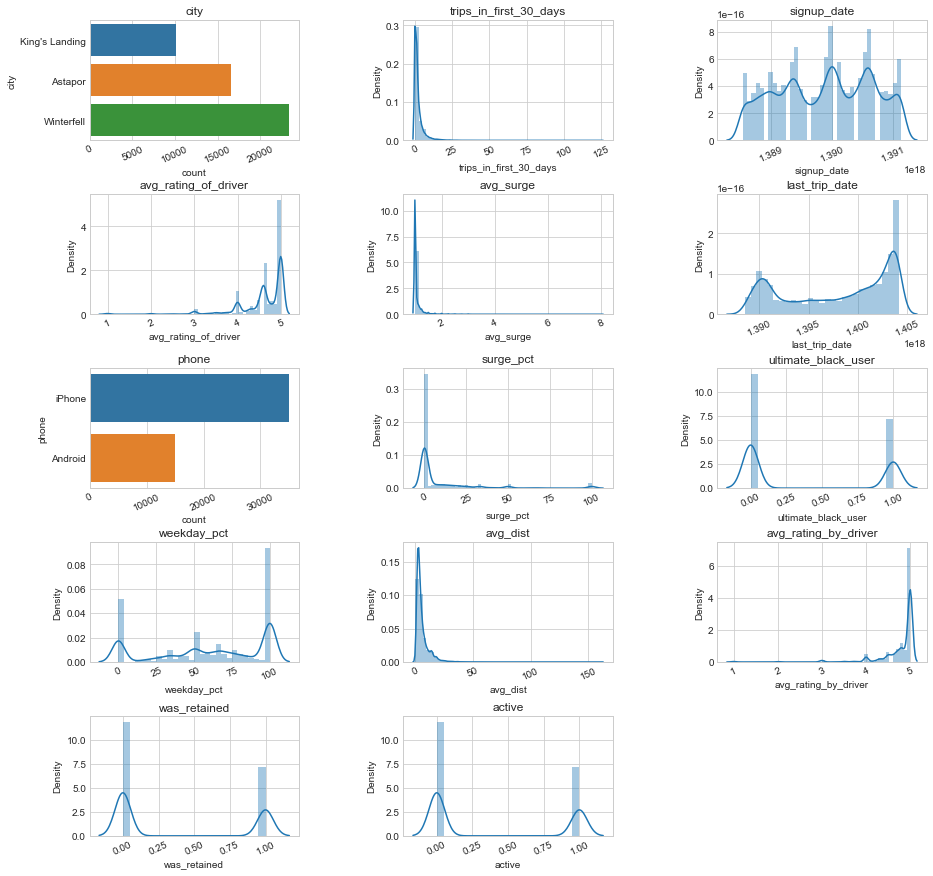

In [37]:
# Let’s plot the distribution of each feature for plot_distribution
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object: #Categorical
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else: #Numerical
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(df, cols=3, width=15, height=15, hspace=0.45, wspace=0.5)

<AxesSubplot:xlabel='count', ylabel='phone'>

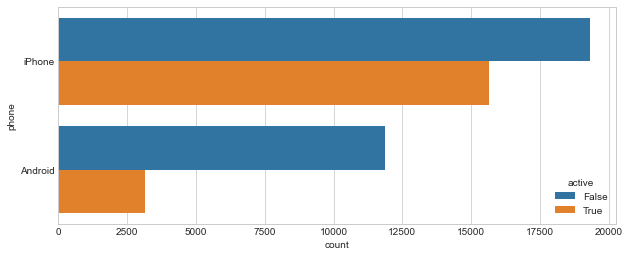

In [38]:
# categorical bi-variate analysis
plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(10,4)) 
sns.countplot(y='phone', hue="active", data=df)

<AxesSubplot:xlabel='count', ylabel='city'>

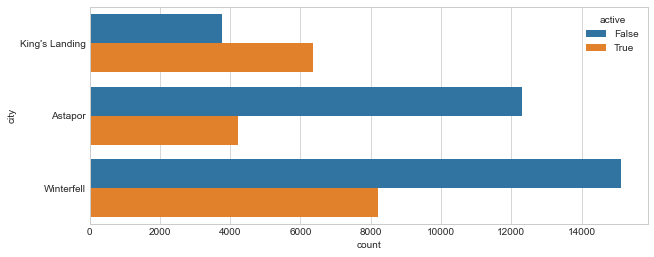

In [39]:
fig = plt.figure(figsize=(10,4)) 
sns.countplot(y='city', hue="active", data=df)

<AxesSubplot:xlabel='phone', ylabel='ultimate_black_user'>

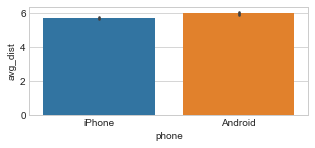

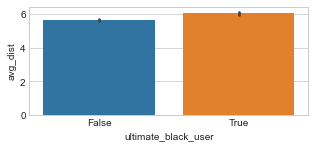

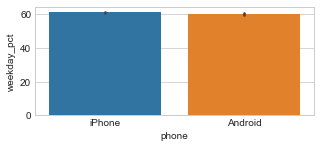

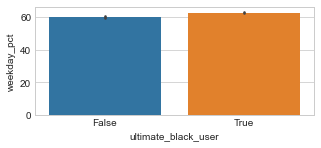

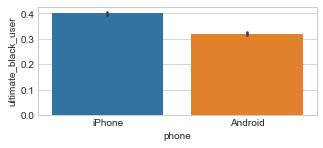

In [40]:
# two variables
fig = plt.figure(figsize=(5,2)) 
sns.barplot(x='phone', y='avg_dist', data=df)

fig = plt.figure(figsize=(5,2)) 
sns.barplot(y='avg_dist', x='ultimate_black_user', data=df)

fig = plt.figure(figsize=(5,2)) 
sns.barplot(x='phone', y='weekday_pct', data=df)

fig = plt.figure(figsize=(5,2)) 
sns.barplot(y='weekday_pct', x='ultimate_black_user', data=df)

fig = plt.figure(figsize=(5,2)) 
sns.barplot(x='phone', y='ultimate_black_user', data=df)

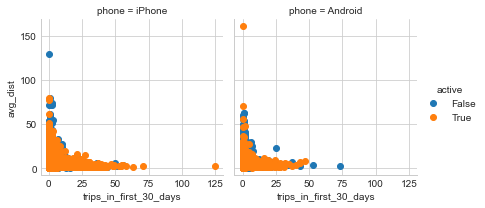

In [41]:
g = sns.FacetGrid(df, col="phone", hue="active")
g = (g.map(plt.scatter, 'trips_in_first_30_days', 'avg_dist').add_legend())


## Feature Importance and Correlation 

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  was_retained            50000 non-null  int32 

In [43]:
# drop time columns

df = df.drop(['last_trip_date', 'signup_date'], axis=1)


In [47]:
bool_feature_mask = df.dtypes==np.bool
bool_cols = df.columns[bool_feature_mask].tolist()

def boolToint(x):
    if(x==True):
        return 1
    elif(x==False):
        return 0
    return "error"
for b in bool_cols:
    df[b] = df[b].apply(boolToint)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    50000 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   phone                   50000 non-null  object 
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  int64  
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    50000 non-null  float64
 10  was_retained            50000 non-null  int32  
 11  active                  50000 non-null  int64  
dtypes: float64(6), int32(1), int64(3), object(2)
memory usage: 4.4+ MB


In [49]:
dfo =df.select_dtypes(include=['object']) # select object type columns
df = pd.concat([df.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)

In [54]:
X = df.drop(["was_retained", "active"], axis = 1)
y = df['active']

In [59]:
X.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,0,1,0,0,1
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,1,0,0,1,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,1,0,0,0,1
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,0,1,0,0,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,0,1,1,0


In [60]:
X.shape


(50000, 13)

<AxesSubplot:>

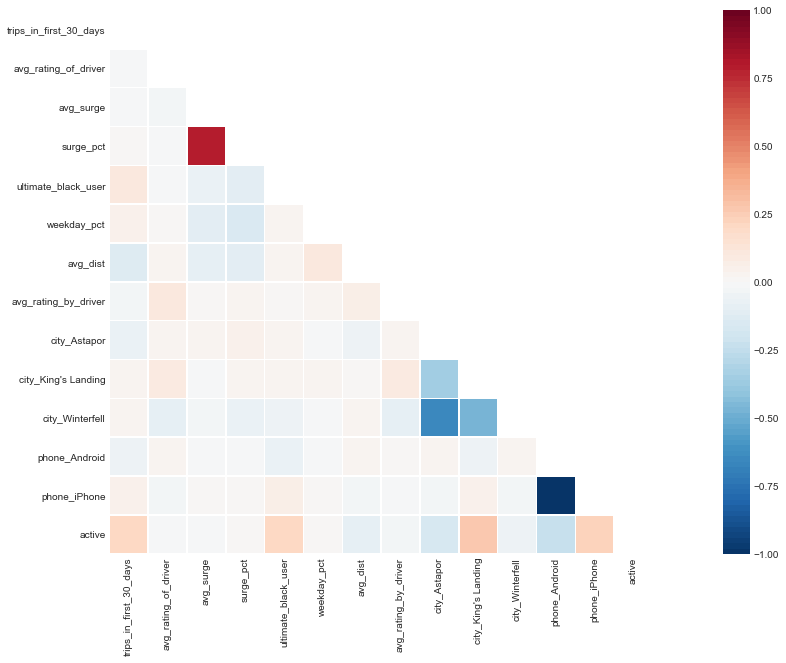

In [61]:
#Create a correlation plot of both datasets.

#corr_Xy = X.join(y)
corr_Xy = pd.concat([X,y], axis=1)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25,10)) 

#plt.subplot(1, 2, 1)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_Xy.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_Xy.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("RdBu_r", 100), 
            mask=mask, 
            linewidths=.5)


                           score
avg_dist                0.299182
weekday_pct             0.133891
avg_rating_by_driver    0.115354
avg_rating_of_driver    0.079567
trips_in_first_30_days  0.079552
surge_pct               0.079486
avg_surge               0.067355
city_King's Landing     0.048801
ultimate_black_user     0.031744
phone_iPhone            0.019668
phone_Android           0.019332
city_Astapor            0.015063
city_Winterfell         0.011005


Text(0.5, 1.0, 'Model Feature Importance RF')

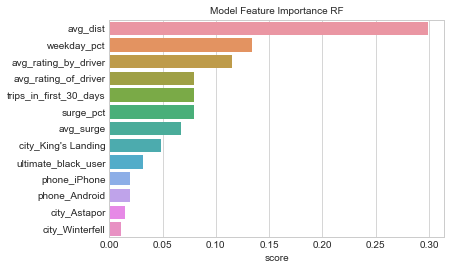

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

model_feature_importance = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train).feature_importances_
feature_scores = pd.DataFrame({'score':model_feature_importance}, index=list(X_train.columns)).sort_values('score', ascending = False)
print(feature_scores)
sns.barplot(feature_scores['score'], feature_scores.index)
plt.title("Model Feature Importance RF", fontsize =10)

In the feature importance analysis, we can find the important features affecting on the target variable of retained users (retained).

The average distance (avg_dist) in the most major important indicator for predicting a retained user.
The percentage of the user's trips occurring durinng a weekday (weekday_pct) and the rider's average rating over all of their trips (avg_rating_by_driver) are also important indicators.
The users who has high usages on weekdays may use the Ultimate cars as main vehicles for commuting (or may not own their own cars).
The users who receive the high ratings can be more considered to be engaged in this service.
==> So, it may be effective to issue the promotional coupons or discounts for highly rated users or high weekday usage users.


In [70]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Class 0: 31196
Class 1: 18804
Proportion: 2 : 1


<AxesSubplot:title={'center':'Count (target)'}>

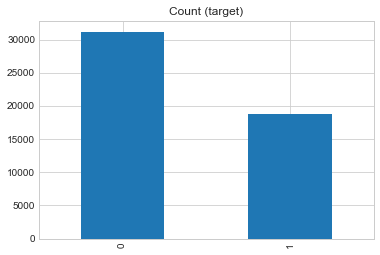

In [72]:
target_count = df.active.value_counts()
print('Class 0: {}'.format(target_count[0]))
print('Class 1: {}'.format(target_count[1]))
print('Proportion: {}'.format(round(target_count[0] / target_count[1]), 2), ': 1')

target_count.plot(kind='bar', title = 'Count (target)')


In [73]:
# Machine learning 
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
#tree
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

import time
import datetime


In [74]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [75]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, y_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [76]:
# Logistic Regression - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)



RandomizedSearchCV took 4.97 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.718 (std: 0.003)
Parameters: {'penalty': 'l2', 'intercept_scaling': 4042599.017082539, 'class_weight': None, 'C': 11246181818.083666}

Model with rank: 2
Mean validation score: 0.717 (std: 0.003)
Parameters: {'penalty': 'l2', 'intercept_scaling': 2.6812841089817718e-17, 'class_weight': None, 'C': 8.018449696978058e-20}

Model with rank: 3
Mean validation score: 0.660 (std: 0.006)
Parameters: {'penalty': 'l2', 'intercept_scaling': 17.787913648646857, 'class_weight': 'balanced', 'C': 1.089691919326183e-07}

Model with rank: 4
Mean validation score: nan (std: nan)
Parameters: {'penalty': 'l1', 'intercept_scaling': 730274857469073.6, 'class_weight': 'balanced', 'C': 2.517329666776036e-11}

Model with rank: 5
Mean validation score: nan (std: nan)
Parameters: {'penalty': 'l1', 'intercept_scaling': 10432.823020258082, 'class_weight': 'balanced', 'C': 90239262970899.28}



In [77]:
# Logistic Regression
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, y_test,
                                                                 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 71.44
Accuracy CV 10-Fold: 71.84
Running Time: 0:00:00.871643


In [78]:
print(metrics.classification_report(y_train, train_pred_log))


              precision    recall  f1-score   support

           0       0.74      0.85      0.79     23408
           1       0.67      0.50      0.57     14092

    accuracy                           0.72     37500
   macro avg       0.70      0.67      0.68     37500
weighted avg       0.71      0.72      0.71     37500



In [79]:
print(metrics.classification_report(y_test, test_pred_log))


              precision    recall  f1-score   support

           0       0.73      0.85      0.79      7788
           1       0.66      0.49      0.56      4712

    accuracy                           0.71     12500
   macro avg       0.70      0.67      0.68     12500
weighted avg       0.71      0.71      0.70     12500



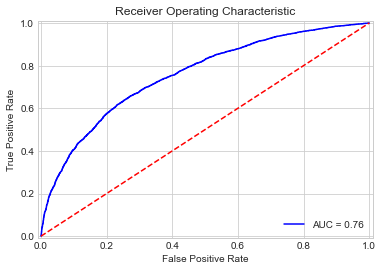

In [80]:
plot_roc_curve(y_test, probs_log)


In [81]:
# k-Nearest Neighbors
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, y_test,
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))


Accuracy: 73.29
Accuracy CV 10-Fold: 73.39
Running Time: 0:00:03.664472


In [82]:
print(metrics.classification_report(y_train, train_pred_knn))



              precision    recall  f1-score   support

           0       0.78      0.80      0.79     23408
           1       0.65      0.62      0.64     14092

    accuracy                           0.73     37500
   macro avg       0.72      0.71      0.71     37500
weighted avg       0.73      0.73      0.73     37500



In [83]:
print(metrics.classification_report(y_test, test_pred_knn))


              precision    recall  f1-score   support

           0       0.77      0.81      0.79      7788
           1       0.66      0.61      0.63      4712

    accuracy                           0.73     12500
   macro avg       0.72      0.71      0.71     12500
weighted avg       0.73      0.73      0.73     12500



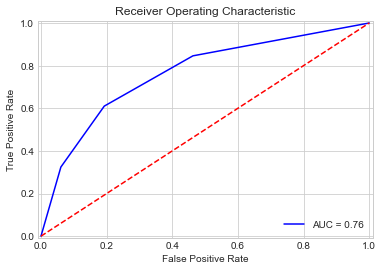

In [84]:
plot_roc_curve(y_test, probs_knn)


In [85]:

# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, y_test,                                                                            
                                                                 10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))


Accuracy: 78.38
Accuracy CV 10-Fold: 78.61
Running Time: 0:00:10.243543


In [86]:
print(metrics.classification_report(y_train, train_pred_gbt))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83     23408
           1       0.74      0.66      0.70     14092

    accuracy                           0.79     37500
   macro avg       0.77      0.76      0.77     37500
weighted avg       0.78      0.79      0.78     37500



In [87]:

print(metrics.classification_report(y_test, test_pred_gbt))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      7788
           1       0.74      0.65      0.69      4712

    accuracy                           0.78     12500
   macro avg       0.77      0.76      0.76     12500
weighted avg       0.78      0.78      0.78     12500



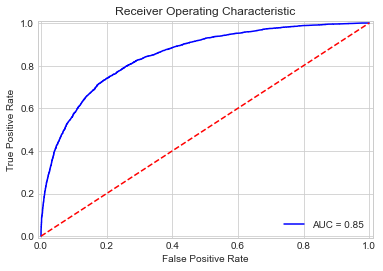

In [88]:
plot_roc_curve(y_test, probs_gbt)

In [89]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression','Gradient Boosting Trees'],
    'Accuracy': [
        acc_knn, 
        acc_log, 
        acc_gbt
    ]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Gradient Boosting Trees,78.38
0,KNN,73.29
1,Logistic Regression,71.44


We have performed EDA, pre-processing, training, feature selection and modeling.

In the feature correlation, we have drawn the heat map and found that there are strong correlation between surge percent and average surge.

In the feature impotance analysis, we use inbuilt class feature_importances of tree based classifiers (e.g., RandomForestClassifier). In the feature importance analysis, we can find the important features affecting on the target variable of retained users (retained).

The average distance (avg_dist) in the most major important indicator for predicting a retained user.
The percentage of the user's trips occurring durinng a weekday (weekday_pct) and the rider's average rating over all of their trips (avg_rating_by_driver) are also important indicators.
The users who has high usages on weekdays may use the Ultimate cars as main vehicles for commuting (or may not own their own cars).
The users who receive the high ratings can be more considered to be engaged in this service.
==> So, it may be effective to issue the promotional coupons or discounts for highly rated users or high weekday usage users.
The rest features are also important in the following order.
surge_pct, avg_rating_of_driver, trips_in_first_30_days, avg_surge, city_King's Landing, phone_iPhone, ultimate_black_user, and city_Winterfell
For the model results, we obtain the best accuracy in the Gradient Boosting Trees model (Accuracy 78.78). The accuracy needs to be improved using more rich data and features.